# **--------------------------PARTIE 1 : Préparation d'environnement----------------------------**

# **1.4. Vérifier la ressource selectionnés** 

In [ ]:
! nvidia-smi # indiquer que c'est une commande linux avec le '!'
! ls

Sat Jan 22 17:06:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    32W /  70W |    432MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **1.4. Afficher votre graphe avec Plot**

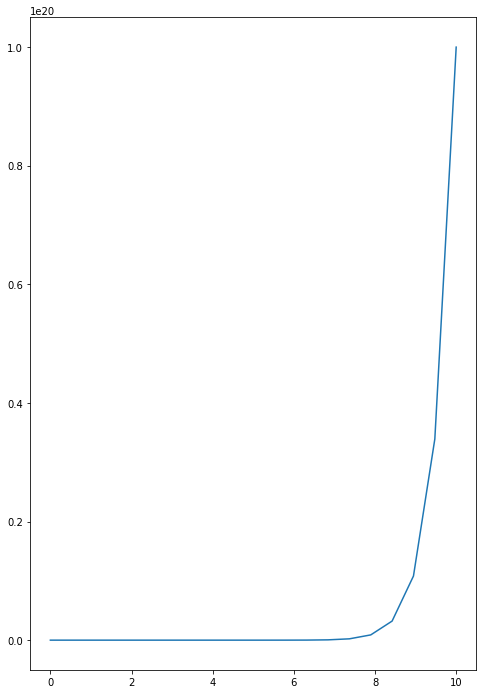

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 20)
y1 = x**20
plt.plot(x,y1)
plt.show()

# **1.5. Modifier la fonction de l'équation et affichez de nouveau**


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


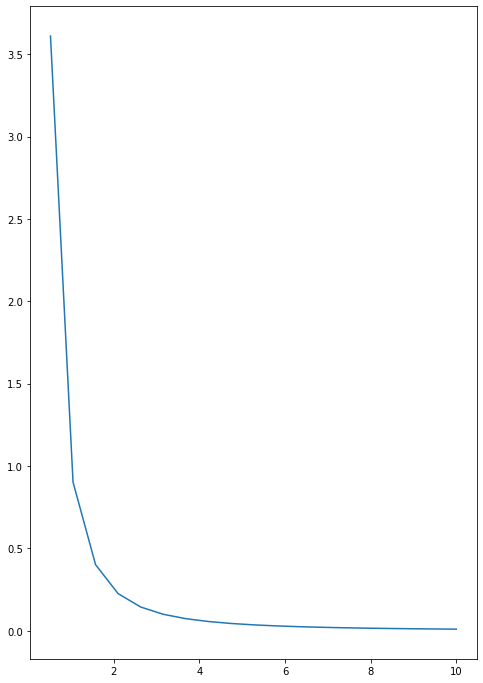

In [ ]:
y2 = 1/x**2
plt.plot(x,y2)
plt.show()

# **1.6. Tracez deux courbes (sin(x) et cos(x)) dans le même plot**

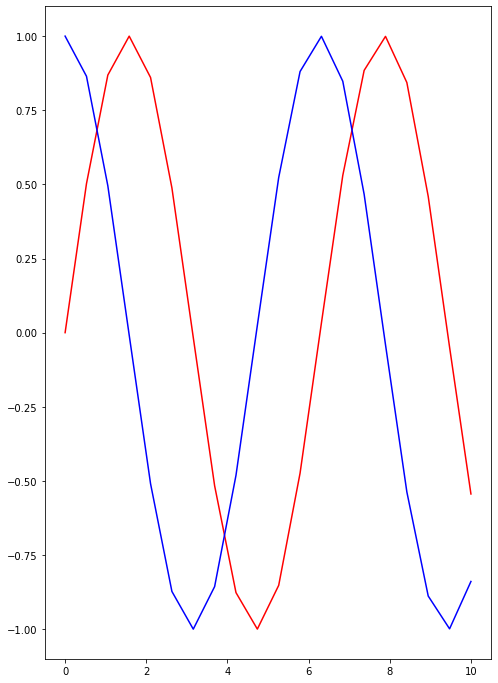

In [ ]:
plt.figure()
y3 = np.sin(x)
y4 = np.cos(x)
plt.plot(x,y3, 'r')
plt.plot(x, y4, 'b')
plt.show()

# **-------------PARTIE 2: importation des librariries et chargement des données------------**



# **Q1 : exécuter la cellule pour importer les librairies Python (Sklearn, pandas, numpy...)**

In [ ]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

# **Q2. exécuter la cellule pour importer librairies de Keras et Tensorflow**


In [ ]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from keras.models import load_model

# **Q3. Télécharger des données**

In [ ]:
housing = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')
housing = housing.reindex(np.random.permutation(housing.index))

# **Q4. Véririfier la taille des données**

In [ ]:
housing.shape

(17000, 9)

# **Q5. Afficher les 30 premières valeurs**

In [ ]:
housing.head(30)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6152,-118.23,33.89,35.0,1255.0,344.0,1782.0,343.0,2.1949,95100.0
3954,-117.96,33.85,35.0,1175.0,191.0,568.0,186.0,4.1250,189200.0
3041,-117.80,33.69,13.0,1161.0,289.0,630.0,296.0,3.3438,333300.0
4643,-118.07,34.10,28.0,676.0,177.0,543.0,185.0,3.2361,187500.0
14898,-122.23,38.14,36.0,1412.0,260.0,792.0,268.0,2.3056,90400.0
11436,-121.24,38.82,5.0,12259.0,1643.0,4819.0,1582.0,5.4498,217300.0
3010,-117.79,33.69,16.0,3067.0,396.0,1275.0,372.0,8.7385,340000.0
16138,-122.46,37.70,42.0,876.0,216.0,713.0,203.0,3.8400,235900.0
2305,-117.45,34.10,9.0,4288.0,1017.0,3156.0,900.0,2.7827,105800.0
10421,-120.27,38.29,10.0,3486.0,695.0,298.0,124.0,3.3542,103800.0


# **Q6. Compléter la cellule pour vérifier la présence de valeurs nulles**


In [ ]:
pre_values = pd.DataFrame(housing.isnull().sum())
print('Nombre de valeurs non nulles par colonne (avant suppression)', pre_values)
print('Taille avant suppression ', housing.shape)
housing = housing.dropna(axis=0)             # Suppression des valeurs nulles
post_values = pd.DataFrame(housing.isnull().sum())
print('Nombre de valeurs non nulles par colonne (après suppression)', post_values)
print('Taille après suppression ', housing.shape)

Nombre de valeurs non nulles par colonne (avant suppression)                     0
longitude           0
latitude            0
housing_median_age  0
total_rooms         0
total_bedrooms      0
population          0
households          0
median_income       0
median_house_value  0
Taille avant suppression  (17000, 9)
Nombre de valeurs non nulles par colonne (après suppression)                     0
longitude           0
latitude            0
housing_median_age  0
total_rooms         0
total_bedrooms      0
population          0
households          0
median_income       0
median_house_value  0
Taille après suppression  (17000, 9)


# **Q8. Sélection des données d'apprentissage et calcul d'une nouvelle caractéristique (room_per_person)**



In [ ]:
def preprocess_features(california_housing_dataframe):
    selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"]]
    processed_features = selected_features.copy()
  # Create a synthetic feature.
    processed_features["rooms_per_person"] = (
    california_housing_dataframe["total_rooms"] /
    california_housing_dataframe["population"])
    return processed_features


# **Q9. Compléter la cellule pour définir des données cibles (targets (Y))**

In [ ]:
def preprocess_targets(california_housing_dataframe):
    output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
    output_targets['median_house_value'] = (
    california_housing_dataframe['median_house_value'] / 1000.0)
    return output_targets

# **Q10. Sélectionner les données d'apprentissage (X)**

In [ ]:
training_examples = preprocess_features(housing.head(12000))
training_examples.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,35.628902,-119.561382,28.465750,2653.132250,541.310083,1428.736250,502.612917,3.891830,1.993993
std,2.135128,2.004056,12.608605,2185.279182,423.109488,1159.397637,385.505647,1.902892,1.273386
min,32.540000,-124.300000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.104410
25%,33.930000,-121.790000,18.000000,1468.000000,298.750000,793.750000,283.000000,2.574125,1.530832
50%,34.250000,-118.490000,28.000000,2142.000000,436.000000,1168.000000,411.000000,3.552450,1.942755
75%,37.720000,-118.000000,37.000000,3167.000000,652.000000,1728.000000,608.000000,4.777225,2.299201
max,41.950000,-114.310000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,55.222222


# **Q11. Sélectionner les données cibles (Y)**

In [ ]:
training_targets = preprocess_targets(housing.head(12000))
training_targets.describe()

,median_house_value
count,12000.000000
mean,207.977257
std,116.589987
min,14.999000
25%,120.000000
50%,179.800000
75%,265.625000
max,500.001000


# **Q12. Sélectionner les données de validation (5000)**

In [ ]:
validation_examples = preprocess_features(housing.tail(5000))
validation_targets = preprocess_targets(housing.tail(5000))

# **Q13. Visualiser les données sur la carte de la Californie**

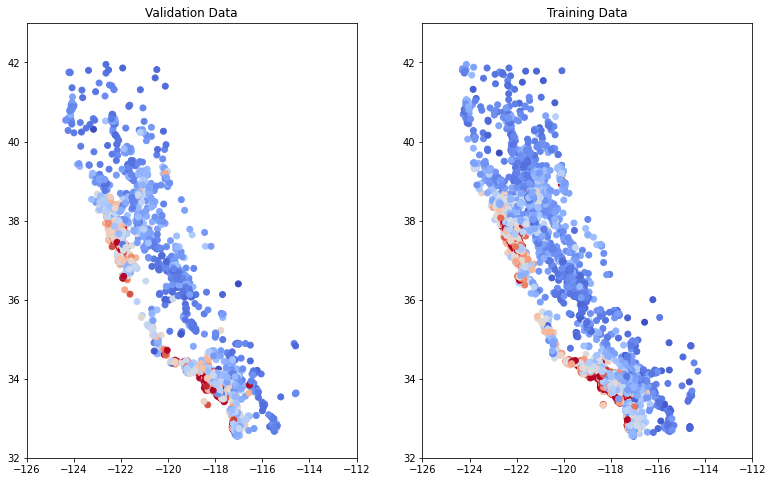

In [ ]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(validation_examples["longitude"],
            validation_examples["latitude"],
            cmap="coolwarm",
            c=validation_targets["median_house_value"] / validation_targets["median_house_value"].max())

ax = plt.subplot(1,2,2)
ax.set_title("Training Data")

ax.set_autoscaley_on(False)
ax.set_ylim([32, 43])
ax.set_autoscalex_on(False)
ax.set_xlim([-126, -112])
plt.scatter(training_examples["longitude"],
            training_examples["latitude"],
            cmap="coolwarm",
            c=training_targets["median_house_value"] / training_targets["median_house_value"].max())
_ = plt.plot()

# **Q15. Corriger/adapter une des cellules ci-dessus en fonction du résultat. Visualiser de nouveau (Q13)**

# *Il faut juste melanger les données lorsque on les load ==> permutation des donnes et réindexation*

# **------------------------PARTIE 3: création du modèle de régression------------------------**

# **Q16. Convertir les données vers le format numpy**

In [ ]:
training_examples = np.array(training_examples)
training_targets = np.array(training_targets)
validation_examples = np.array(validation_examples)
validation_targets = np.array(validation_targets)

# **Q17. Définir le modèle de régression linéaire avec Keras**

In [ ]:
def basic_model_kera_regression(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="softmax",input_shape=(x_size,)))
    t_model.add(Dense(y_size))
    sgd1=optimizers.SGD(0.01)
    t_model.compile(loss='mean_squared_error',
        optimizer=sgd1,
        metrics=[metrics.mae])
    return(t_model)

# **Q18. Appeler le modèle en question**

In [ ]:
model= basic_model_kera_regression(training_examples.shape[1], training_targets.shape[1])

# **Q19. Vérifier l'architecture du modèle**



In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               1000      
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


#**Q20. Définir les paramètre d'entrainement**

In [ ]:
epochs = 100
batch_size = 128

# **Q21. Lancer l'entrainement**

In [ ]:
history = model.fit(training_examples, training_targets,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2) # Change it to 2, if wished to observe execution

Epoch 1/100
94/94 - 0s - loss: 19499.2168 - mean_absolute_error: 103.8858 - 411ms/epoch - 4ms/step
Epoch 2/100
94/94 - 0s - loss: 13601.0332 - mean_absolute_error: 91.9929 - 154ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 13594.5801 - mean_absolute_error: 92.2131 - 169ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 13595.2588 - mean_absolute_error: 92.2912 - 181ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 13596.4307 - mean_absolute_error: 92.3510 - 170ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 13595.7881 - mean_absolute_error: 92.3776 - 161ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 13593.2656 - mean_absolute_error: 92.3610 - 176ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 13595.0918 - mean_absolute_error: 92.1632 - 165ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 13595.7959 - mean_absolute_error: 92.3134 - 165ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 13595.8242 - mean_absolute_error: 92.3375 - 162ms/epoch - 2ms/step
Epoch 11/100
94/94

# **Q22. Afficher les courbes d'erreur**

In [ ]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.title('MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()
    return

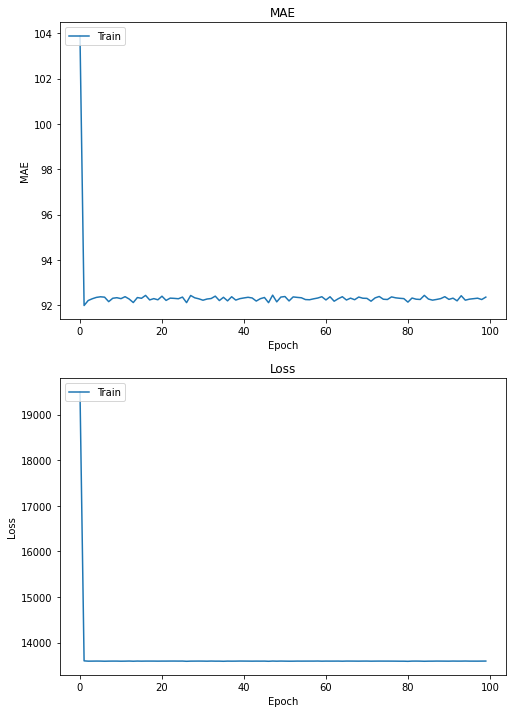

In [ ]:
plot_hist(history.history, xsize=8, ysize=12)

# **Q25. Sauvegarder le meilleur modèle**

In [ ]:
model.save('epoch100_254.h5')

# **---------------------- PARTIE 4: Evaluation du modèle ----------------------------**

# **Q26. Télécharger les données de test**

In [ ]:
housing = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv')

# **Q27. Préparer (pré-traiter) les données de test**

In [ ]:
x_test = preprocess_features(housing)
y_test = preprocess_targets(housing)

# **Q28. Convertir les données de test vers le format numpy**

In [ ]:
x_test = np.array(x_test)
y_test = np.array(y_test)

# **Q29. Evaluer le modèles avec les données d'entrainement, validation et test (3 scores)**

In [ ]:
model.evaluate(x_test, y_test)
# ???????????????????????
# ???????????????????????
# ???????????????????????
# ???????????????????????
# ???????????????????????

532/532 [==============================] - 1s 2ms/step - loss: 13452.0938 - mean_absolute_error: 91.7997


[13452.09375, 91.79971313476562]

# **Q30. Calculer les prédiction pour les 10 premières maisons de la base de test en afficant les prix réels**

In [ ]:
predicitons = model.predict(x_test[:10])
for i in range(10):
  print("Prediction : {}, Real value: {}".format(predicitons[i], y_test[i]))
  
# ???????????????????????
# ???????????????????????

Prediction : [208.10858], Real value: [66.9]
Prediction : [208.10858], Real value: [80.1]
Prediction : [208.10858], Real value: [85.7]
Prediction : [208.10858], Real value: [73.4]
Prediction : [208.10858], Real value: [65.5]
Prediction : [208.10858], Real value: [74.]
Prediction : [208.10858], Real value: [82.4]
Prediction : [208.10858], Real value: [48.5]
Prediction : [208.10858], Real value: [58.4]
Prediction : [208.10858], Real value: [48.1]
